In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")



In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
print(df.head())
print(df.info())
print(df.describe())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

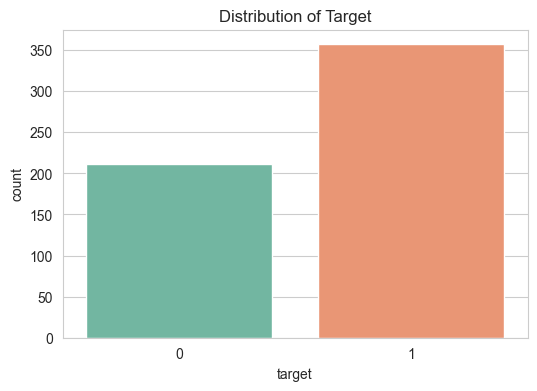

In [4]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Distribution of Target")
plt.show()

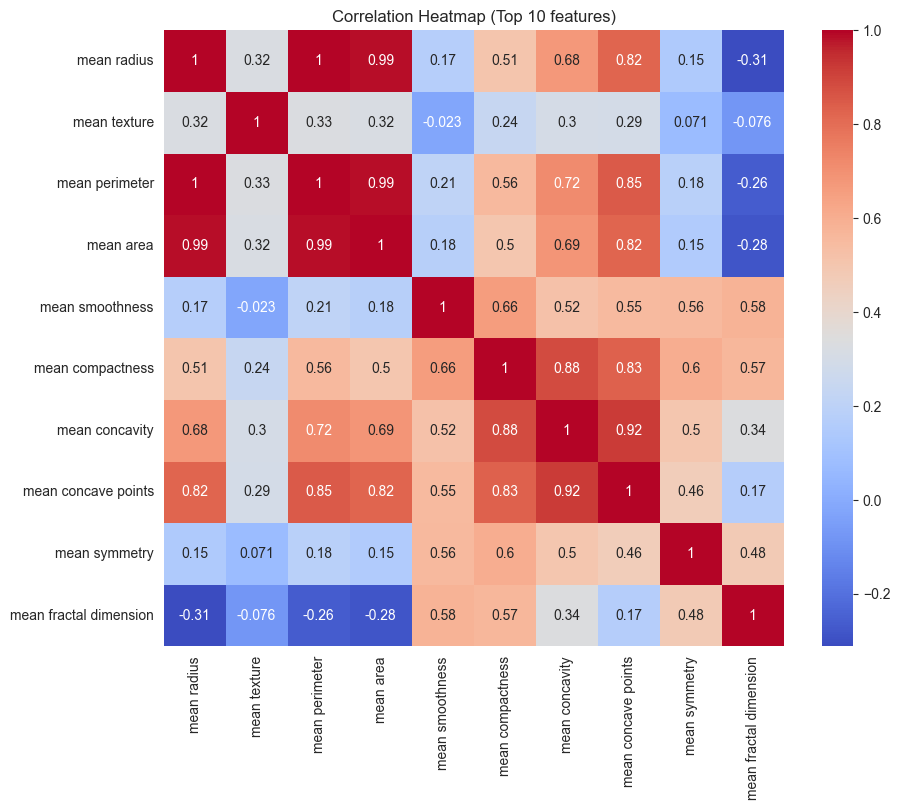

In [5]:
# Correlation heatmap (top 10 features for clarity)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().iloc[:10,:10], annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 10 features)")
plt.show()


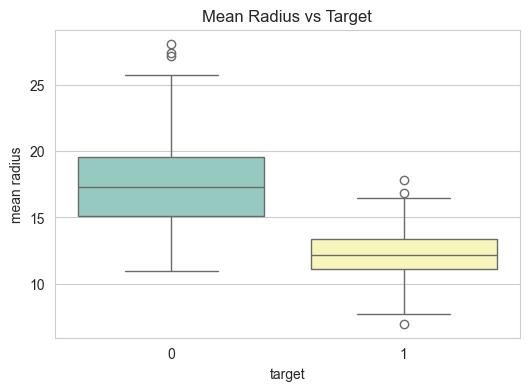

In [6]:
# Boxplot example
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='mean radius', data=df, palette='Set3')
plt.title("Mean Radius vs Target")
plt.show()



In [7]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [11]:
y_pred = rf.predict(X_test_scaled)

In [12]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.956140350877193

Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



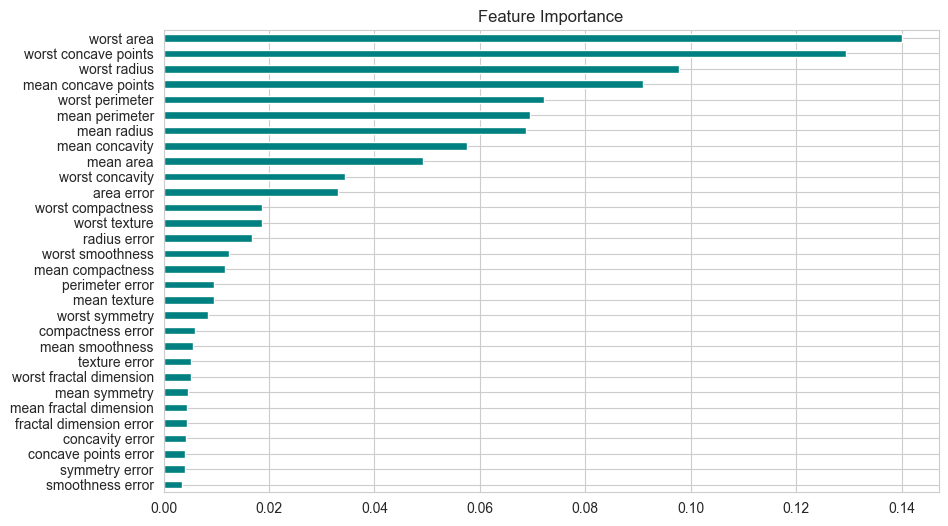

In [13]:
# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.show()


In [15]:
joblib.dump(rf, "model.pkl")              # FIXED
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")

print("✅ Model, scaler, features saved successfully")

✅ Model, scaler, features saved successfully


In [17]:
# app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.datasets import load_breast_cancer

# Load saved files
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
features = joblib.load("features.pkl")

# Load dataset for default values
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

st.title("🩺 Breast Cancer Prediction (Simple)")

st.write("Enter values and click Predict")

# ONLY 3 inputs (VERY SIMPLE)
mean_radius = st.slider("Mean Radius", 6.0, 30.0, float(df["mean radius"].mean()))
mean_texture = st.slider("Mean Texture", 9.0, 40.0, float(df["mean texture"].mean()))
mean_area = st.slider("Mean Area", 150.0, 2500.0, float(df["mean area"].mean()))

# Create input row
input_data = pd.DataFrame(columns=features)

# Fill with mean values
for col in features:
    input_data.loc[0, col] = df[col].mean()

# Replace user inputs
input_data.loc[0, "mean radius"] = mean_radius
input_data.loc[0, "mean texture"] = mean_texture
input_data.loc[0, "mean area"] = mean_area

# Scale
input_scaled = scaler.transform(input_data)

# Predict
if st.button("Predict"):
    result = model.predict(input_scaled)[0]
    if result == 0:
        st.error("🔴 Malignant (Cancer)")
    else:
        st.success("🟢 Benign (No Cancer)")


2025-12-19 14:24:16.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 14:24:16.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar